# EXPLORATORY DATA ANALYSIS

for **'KIVA'** - https://www.kiva.org/

**Research questions:** 
<br>1. Who are the main users of KIVA services and why? 
<br>2. Are there any specific issues related to the current KIVA's situation? 

### Libraries & Configurations

Comments. First, it is necessary to upload datafiles to the virtual directory. 

In [ ]:
import math
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
plt.style.use('seaborn')

from google.colab import files 

# Font for styling axes' names:
font_settings = {'family': 'Arial', 'size': 25}

# Styling axes' data:
plt.rc('ytick', labelsize = 20)
plt.rc('xtick', labelsize = 22)

# A - Data overview

In [ ]:
# files.upload() - загрузка в виртуальную директорию нужных файлов. С этой виртуальной директорией будут ассоциированы все параметры пути. 
df_kiva_loans = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv('kiva_mpi_region_locations.csv')

In [ ]:
df_kiva_loans.tail(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


In [ ]:
df_mpi.head(2)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538


## Data cleanness check-up

*DATASET 1. MISSING VALUES COUNT*

tags - only 75% present, region - 90% present:


<AxesSubplot:>

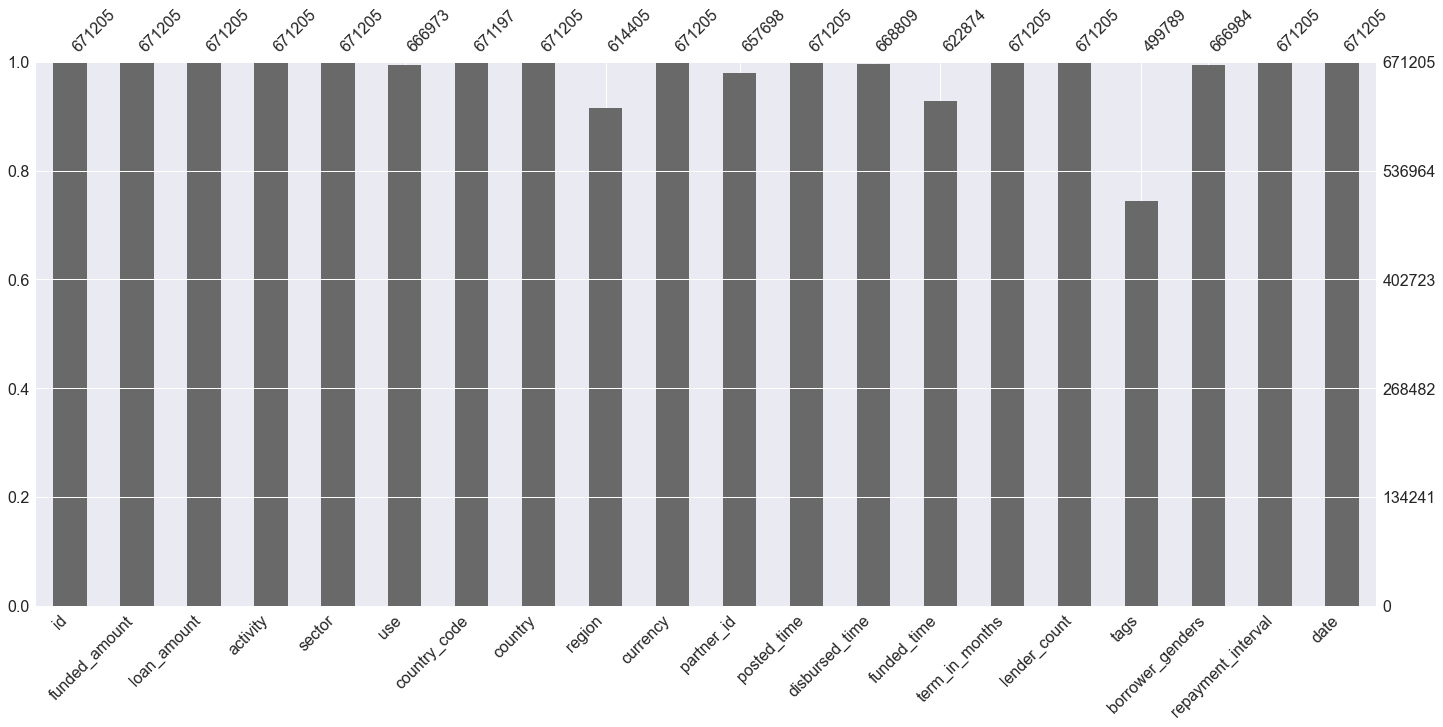

In [ ]:
print('tags - only 75% present, region - 90% present:')
msno.bar(df_kiva_loans)

<AxesSubplot:>

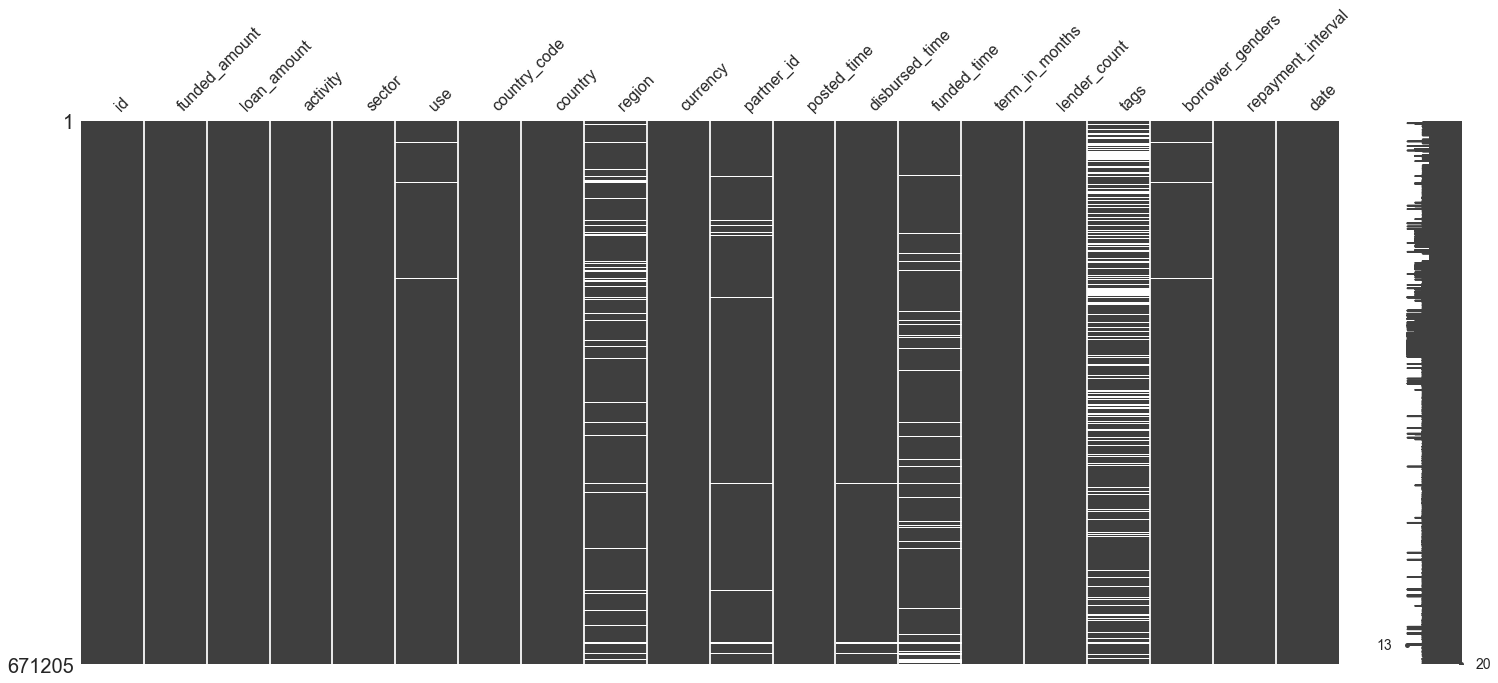

In [ ]:
msno.matrix(df_kiva_loans)

*DATASET 2. MISSING VALUES COUNT*

In all the columns except geo only 40% values are present:


<AxesSubplot:>

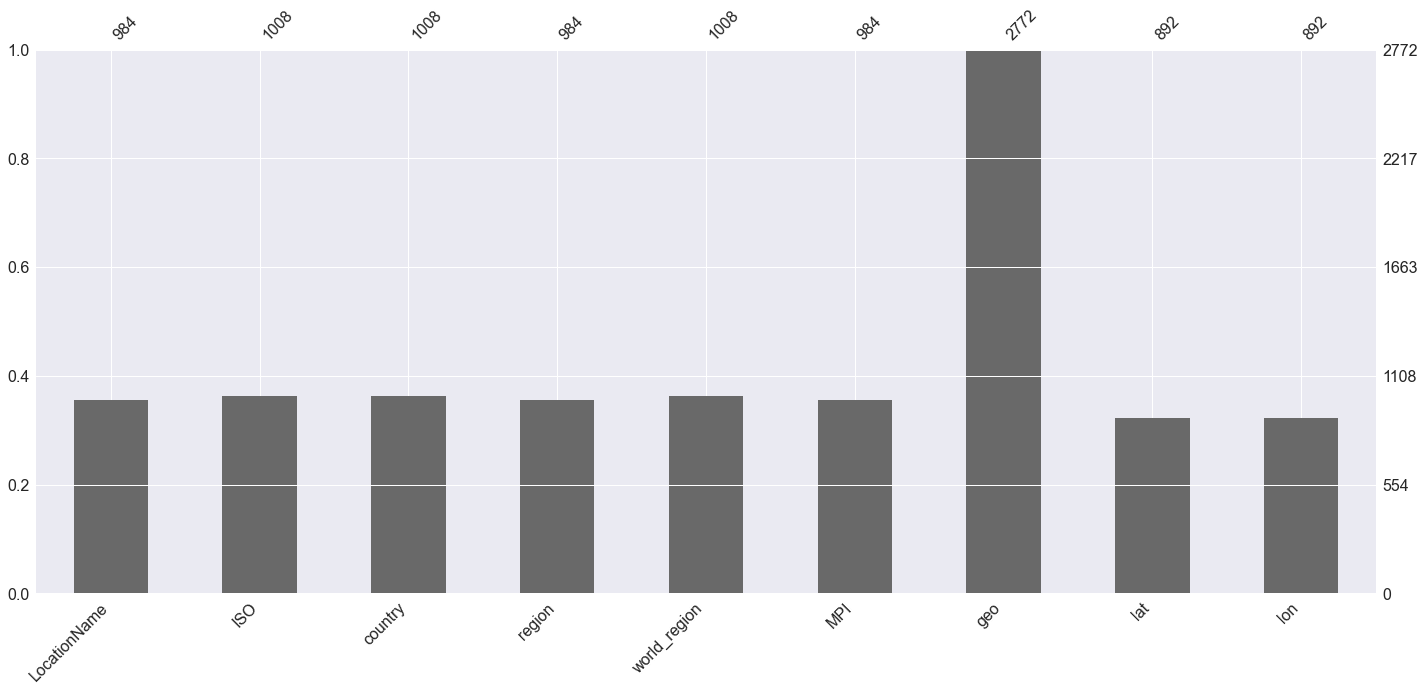

In [ ]:
print('In all the columns except geo only 40% values are present:')
msno.bar(df_mpi)

<AxesSubplot:>

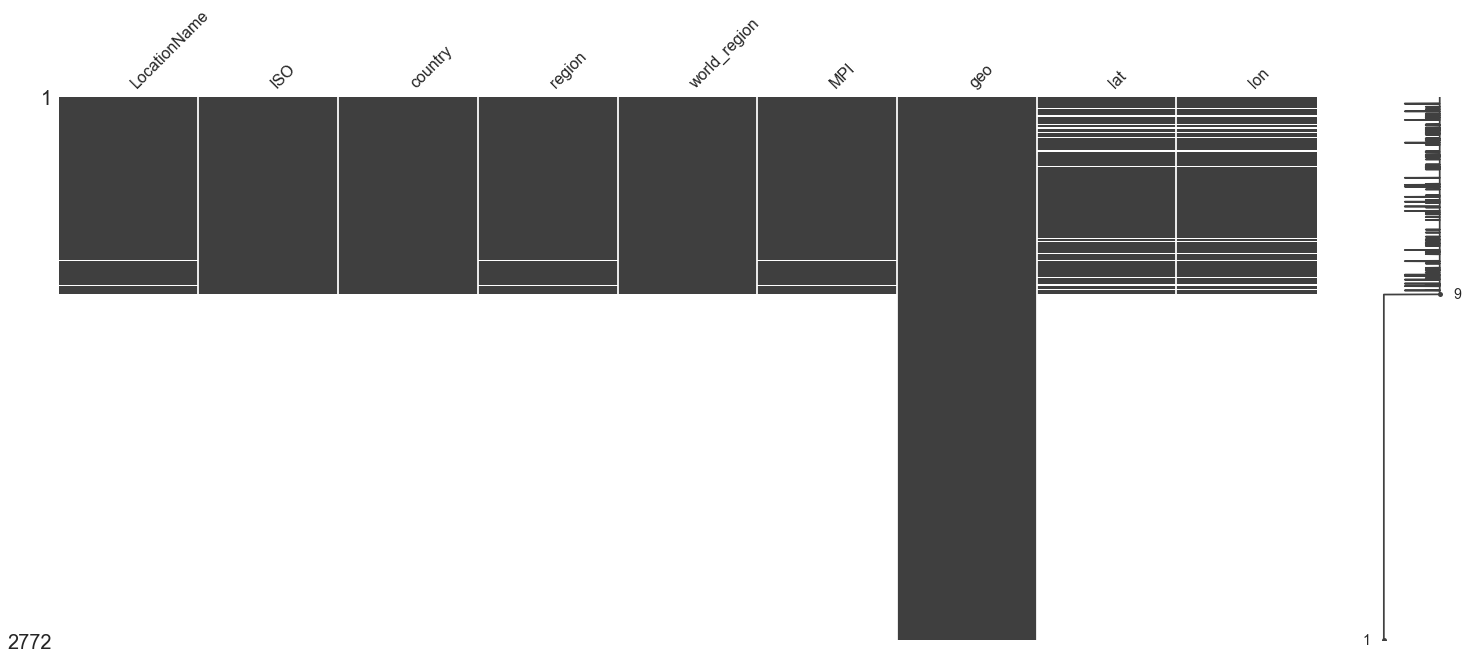

In [ ]:
msno.matrix(df_mpi)

<hr>

## Data Profiling

*DATASET 1 - DATA TYPES*

In [ ]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

*DATASET 2 - DATA TYPES*

In [ ]:
df_mpi.dtypes

LocationName     object
ISO              object
country          object
region           object
world_region     object
MPI             float64
geo              object
lat             float64
lon             float64
dtype: object

*DATASET 1 - OVERVIEW INDICATORS*

In [ ]:
# NUMERIC DATA
df_kiva_loans.describe(include = np.number)

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [ ]:
# CATEGORICAL DATA
df_kiva_loans.describe(include = object)

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


*DATASET 2 - DATA TYPES*

In [ ]:
# NUMERIC DATA
df_mpi.describe(include = np.number)

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


In [ ]:
# CATEGORICAL DATA
df_mpi.describe(include = object)

,LocationName,ISO,country,region,world_region,geo
count,984,1008,1008,984,1008,2772
unique,984,102,102,928,6,881
top,"Bayelsa, Nigeria",NGA,Nigeria,Eastern,Sub-Saharan Africa,"(1000.0, 1000.0)"
freq,1,37,37,8,432,1880


<HR>

# B - Key tendencies overview

<HR>

## Loans distribution: <br><br>1 - by sector <br><br>2 - by activity <br><br>3 - by purpose<br>

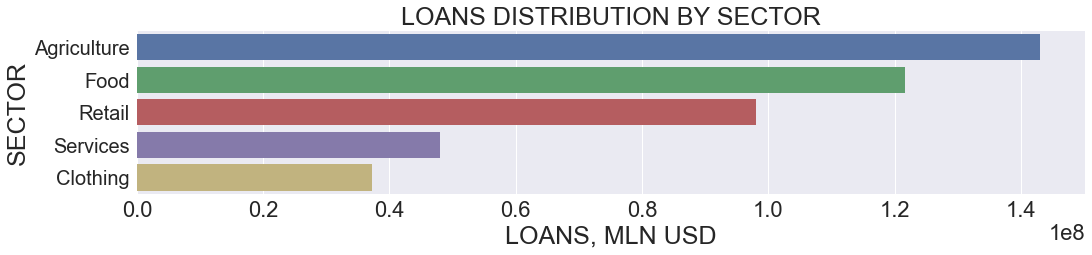

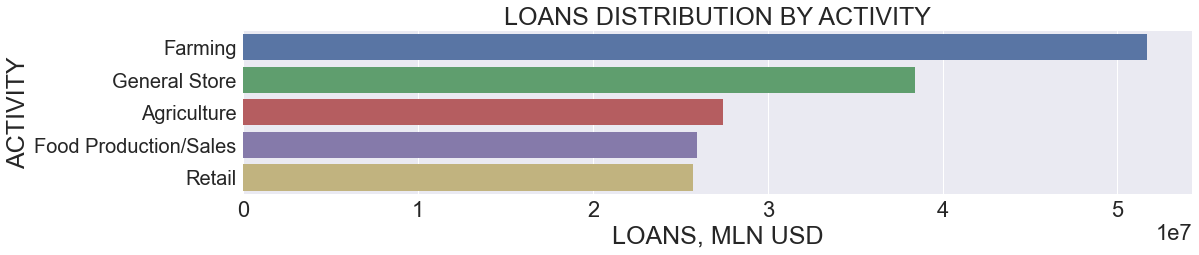

In [ ]:
for item in ['sector', 'activity']:
    fig_by, ax_by = plt.subplots(figsize = (17, 3))
    sorted_by = df_kiva_loans.groupby(item).sum().sort_values('loan_amount', ascending = False).head(5)
    sns.barplot(data = sorted_by, x = 'loan_amount', y = sorted_by.index)
    ax_by.set_title(f'loans distribution by {item}'.upper(), **font_settings)
    ax_by.set_ylabel(f'{item}'.upper(), **font_settings)
    ax_by.set_xlabel('loans, mln usd'.upper(), **font_settings)
plt.show()

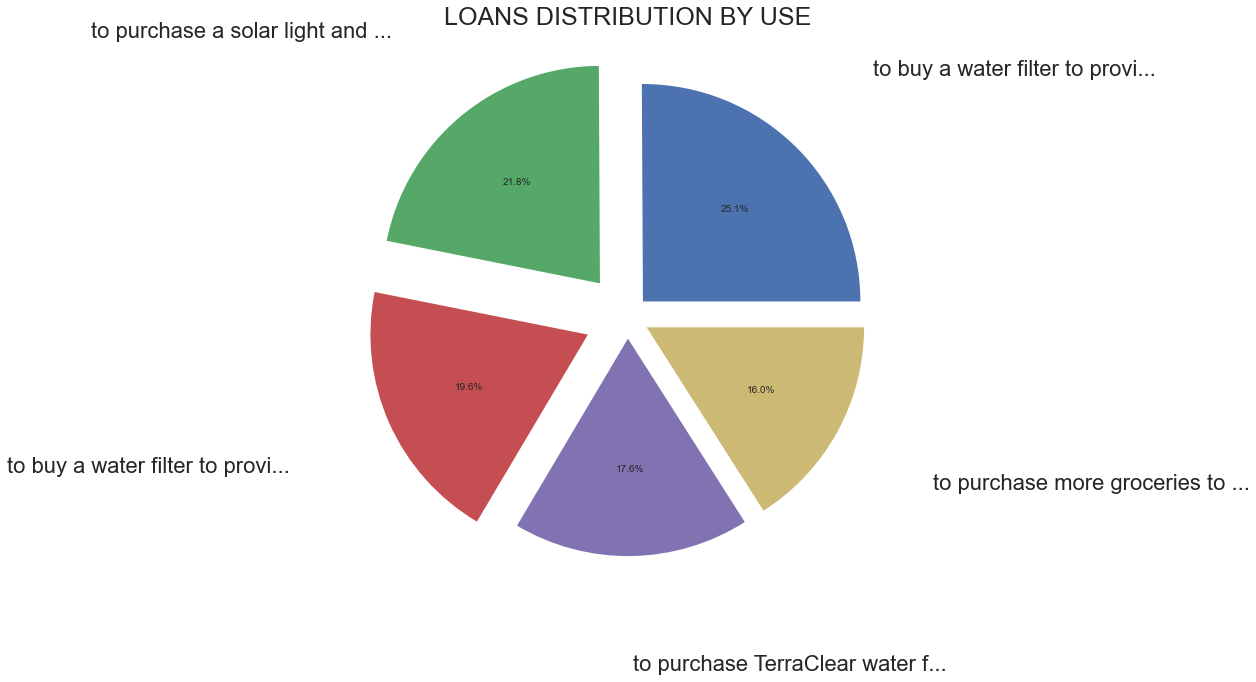

In [ ]:
fig_by_use, ax_by_use = plt.subplots(figsize = (17,10))
sorted_by_use = df_kiva_loans.groupby('use').sum().sort_values('loan_amount', ascending = False).head(5)
lab = [f'{i[:30]}...' for i in sorted_by_use.index]
explode_tuple = (0.1, 0.2, 0.2, 0.1, 0.1)
ax_by_use.pie(data = sorted_by_use, 
              x = 'loan_amount', 
              labels = lab, autopct = '%1.1f%%', 
              labeldistance = 1.5, 
              explode = explode_tuple)
ax_by_use.set_title(f'loans distribution by use'.upper(), **font_settings, pad = 20)
plt.show()

<HR>

## Creating a gender column with adjusted values - <br> female, male, group

In [ ]:
df_kiva_loans['gender_analysed'] = [item if item in ['male', 'female'] else 'group' for item in df_kiva_loans['borrower_genders']]
df_kiva_loans[['gender_analysed', 'borrower_genders']].head()

,gender_analysed,borrower_genders
0,female,female
1,group,"female, female"
2,female,female
3,female,female
4,female,female


### 2. Countries with male dominance among borrowers

In [ ]:
sgs = df_kiva_loans.groupby(['country', 'gender_analysed']).sum()['loan_amount']
sgs_unstack = sgs.unstack().fillna(0)
sgs_unstack.head()

gender_analysed,female,group,male
country,,,
Afghanistan,14000.0,0.0,0.0
Albania,1353750.0,21000.0,1291750.0
Armenia,8454150.0,4925.0,4456325.0
Azerbaijan,1227625.0,115100.0,1545975.0
Belize,11550.0,2050.0,100425.0


In [ ]:
sgs_males = sgs_unstack[(sgs_unstack['male'] > sgs_unstack['female']) & (sgs_unstack['male'] > sgs_unstack['group'])]
sgs_males.head()

gender_analysed,female,group,male
country,,,
Azerbaijan,1227625.0,115100.0,1545975.0
Belize,11550.0,2050.0,100425.0
China,107875.0,8000.0,264650.0
Egypt,412425.0,0.0,690850.0
Kosovo,909075.0,26975.0,1011700.0


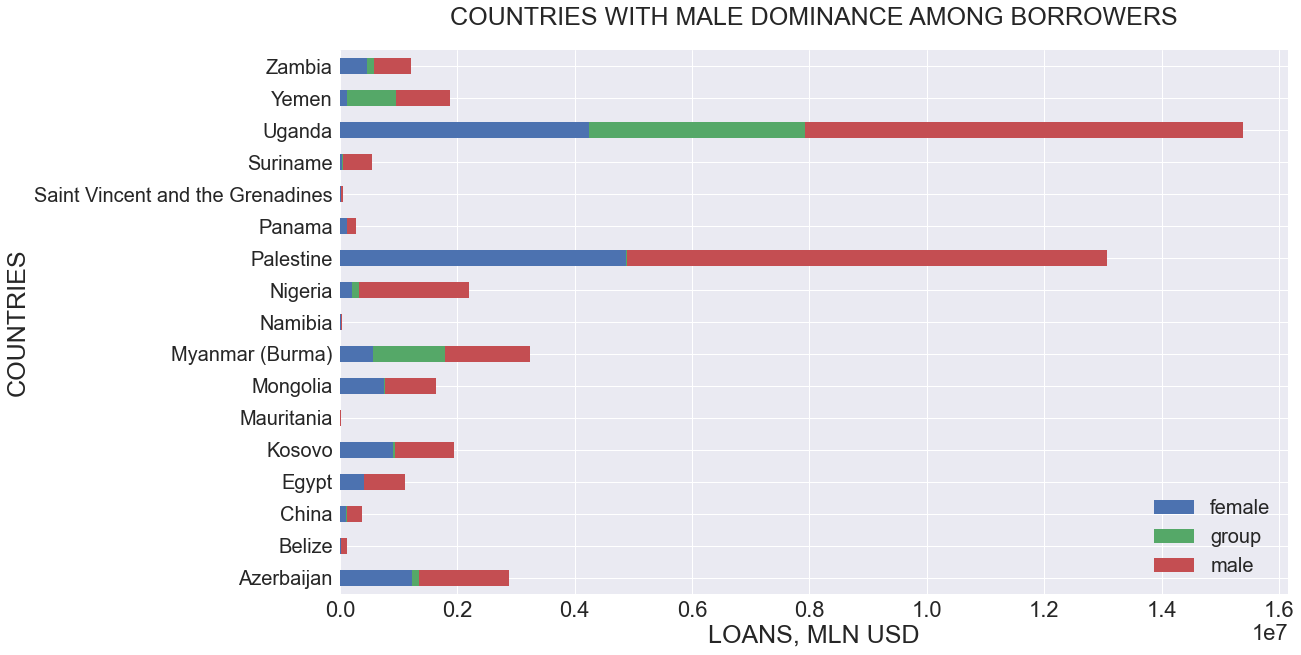

In [ ]:
sgs_males.plot.barh(stacked = True, figsize = (17,10))
plt.title('countries with male dominance among borrowers'.upper(), pad = 25, **font_settings)
plt.xlabel('loans, mln usd'.upper(), **font_settings)
plt.ylabel('countries'.upper(), **font_settings)
plt.legend(loc = 4, prop = {'size': 20})
plt.show()

### 3. Countries with groups'  dominance among borrowers

In [ ]:
sgs_groups = sgs_unstack[(sgs_unstack['group'] > sgs_unstack['female']) & (sgs_unstack['group'] > sgs_unstack['male'])]
sgs_groups.head()

gender_analysed,female,group,male
country,,,
Benin,21400.0,431650.0,65900.0
Bolivia,5075250.0,11520950.0,3247050.0
Brazil,86550.0,540150.0,35500.0
Burkina Faso,59050.0,2868475.0,45175.0
Burundi,0.0,2667850.0,0.0


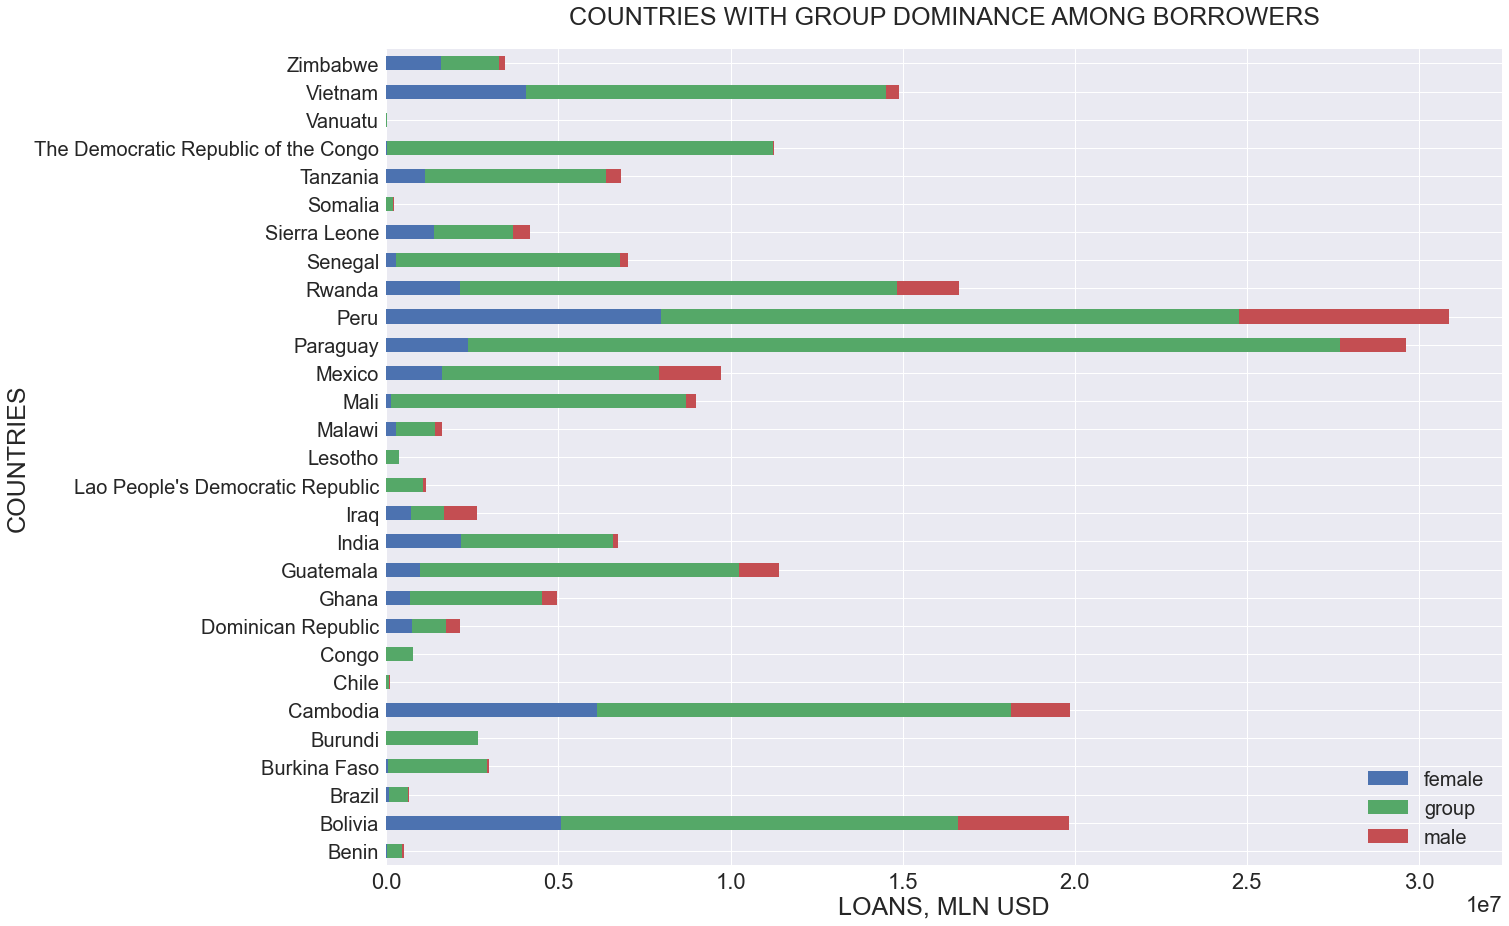

In [ ]:
sgs_groups.plot.barh(stacked = True, figsize = (20,15))
plt.title('countries with group dominance among borrowers'.upper(), pad = 25, **font_settings)
plt.xlabel('loans, mln usd'.upper(), **font_settings)
plt.ylabel('countries'.upper(), **font_settings)
plt.legend(loc = 4, prop = {'size': 20})
plt.show()

<hr>

### 4. Extremely high-volume loans overview

In [ ]:
high_volumes = df_kiva_loans[['activity', 'sector', 'country', 'gender_analysed', 'loan_amount']].sort_values('loan_amount', ascending = False)
high_volumes.head(10)

,activity,sector,country,gender_analysed,loan_amount
70499,Agriculture,Agriculture,Haiti,female,100000.0
408465,Construction,Construction,Peru,group,50000.0
583307,Agriculture,Agriculture,Guatemala,male,50000.0
126839,Agriculture,Agriculture,Mexico,group,50000.0
447374,Agriculture,Agriculture,Uganda,male,50000.0
210975,Agriculture,Agriculture,Rwanda,male,50000.0
53634,Renewable Energy Products,Retail,Uganda,female,50000.0
494470,Agriculture,Agriculture,Kenya,female,50000.0
538248,Agriculture,Agriculture,Kenya,male,50000.0
660807,Renewable Energy Products,Retail,Pakistan,female,50000.0


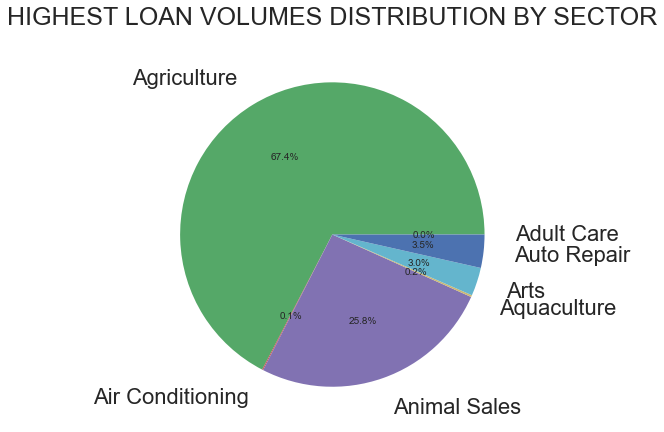

In [ ]:
gr_hi_vol = high_volumes.groupby('activity').sum().head(7)
fig_p, ax_p = plt.subplots(figsize = (17, 7))
ax_p.pie(x = gr_hi_vol['loan_amount'], labels = gr_hi_vol.index, autopct = '%1.1f%%', labeldistance = 1.2)
ax_p.set_title('highest loan volumes distribution by sector'.upper(), **font_settings, pad = 20)
ax_p.set_alpha(0.3)
plt.show()

<hr> 

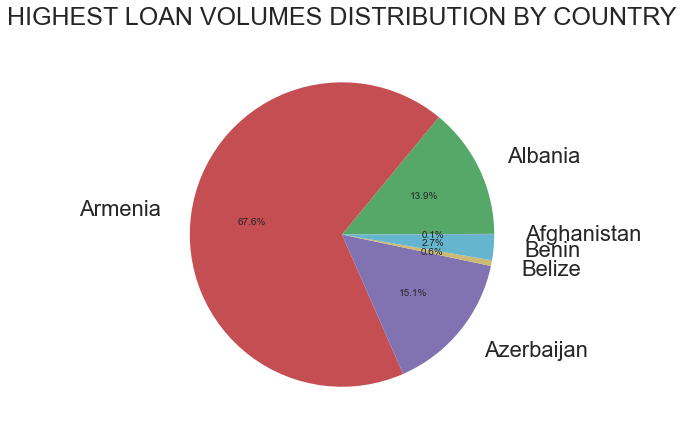

In [ ]:
gr_hi_vol = high_volumes.groupby('country').sum().head(6)
fig_p, ax_p = plt.subplots(figsize = (17, 7))
ax_p.pie(x = gr_hi_vol['loan_amount'], labels = gr_hi_vol.index, autopct = '%1.1f%%', labeldistance = 1.2)
ax_p.set_title('highest loan volumes distribution by country'.upper(), **font_settings, pad = 20)
ax_p.set_alpha(0.3)
plt.show()

<hr>

### 5. Loans distribution by gender - which gender group tends to borrow the most? 

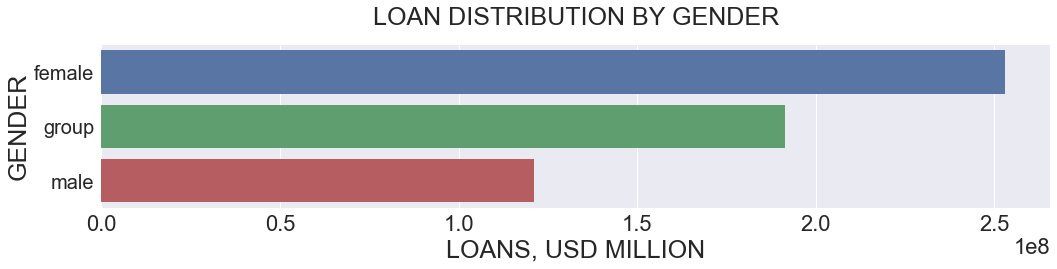

In [ ]:
sorted_by_gender = df_kiva_loans.groupby('gender_analysed').sum().sort_values('funded_amount', ascending = False)
fig_g, ax_g = plt.subplots(figsize = (17, 3))
sns.barplot(data = sorted_by_gender, x = 'loan_amount', y = sorted_by_gender.index)
ax_g.set_title('Loan distribution by gender'.upper(), pad = 20, **font_settings)
ax_g.set_xlabel('Loans, USD million'.upper(), **font_settings)
ax_g.set_ylabel('Gender'.upper(), **font_settings)
plt.show()

**CONCLUSION**: 
<BR>Having visualized the data presented, we can spot a direct connection between **gender** and **loans' volumes**. 
<BR>Females are leading, groups are runner-ups, males tend to borrow the least. 

<HR>

### 6. Loan distribution by countries - who tends to borrow the most? 

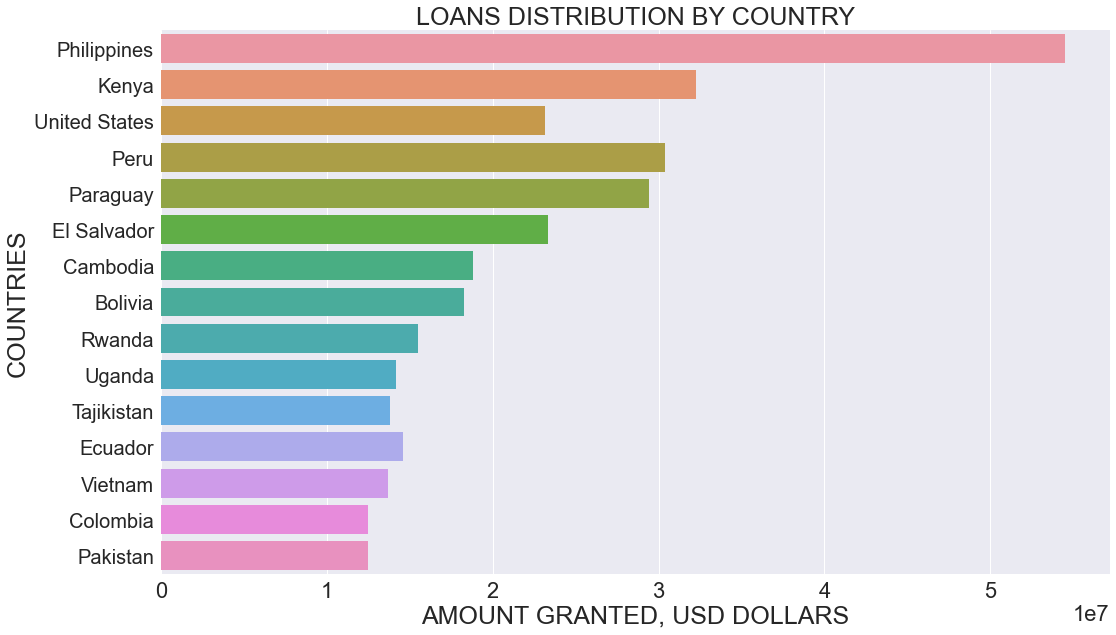

In [ ]:
sorted_by_country = df_kiva_loans.groupby('country').sum().dropna().sort_values('loan_amount', ascending = False).head(15)
fig, ax = plt.subplots(figsize = (17, 10))
sns.barplot(data = sorted_by_country, x = 'funded_amount', y = sorted_by_country.index)
ax.set_title('loans distribution by country'.upper(), **font_settings)
ax.set_xlabel('Amount granted, USD dollars'.upper(), **font_settings)
ax.set_ylabel('Countries'.upper(), **font_settings)
plt.show()

**CONCLUSION**: 
<BR>'Third-world' countries tend to apply for loans more than borrowers from other regions.

<HR>

### 7. Loan distribution by macroregions (world regions)

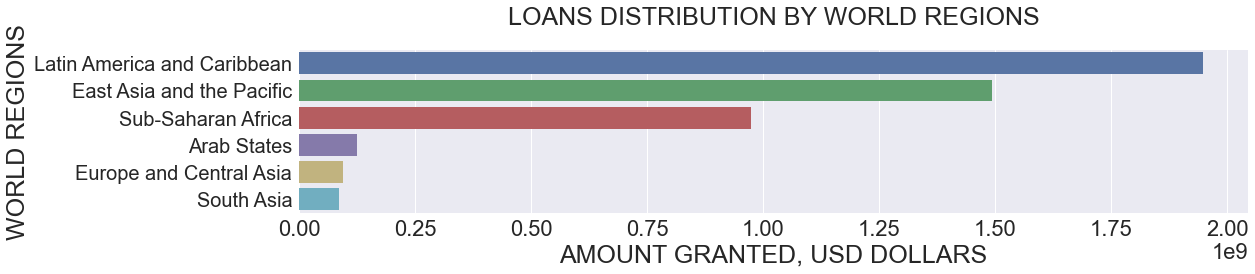

In [ ]:
sorted_by_region = df_kiva_loans.merge(df_mpi, on = 'country').groupby('world_region').sum().sort_values('loan_amount', ascending = False)
fig1, ax1 = plt.subplots(figsize = (17, 3))
sns.barplot(data = sorted_by_region, x = 'funded_amount', y = sorted_by_region.index)
ax1.set_title('loans distribution by world regions'.upper(), pad = 25, **font_settings)
ax1.set_xlabel('Amount granted, USD dollars'.upper(), **font_settings)
ax1.set_ylabel('World regions'.upper(), **font_settings)
plt.show()

**CONCLUSION**:
<br>Latin America and East Asia tend to borrow the most. 

<hr>

### 8. Borrowers' gender structure by country

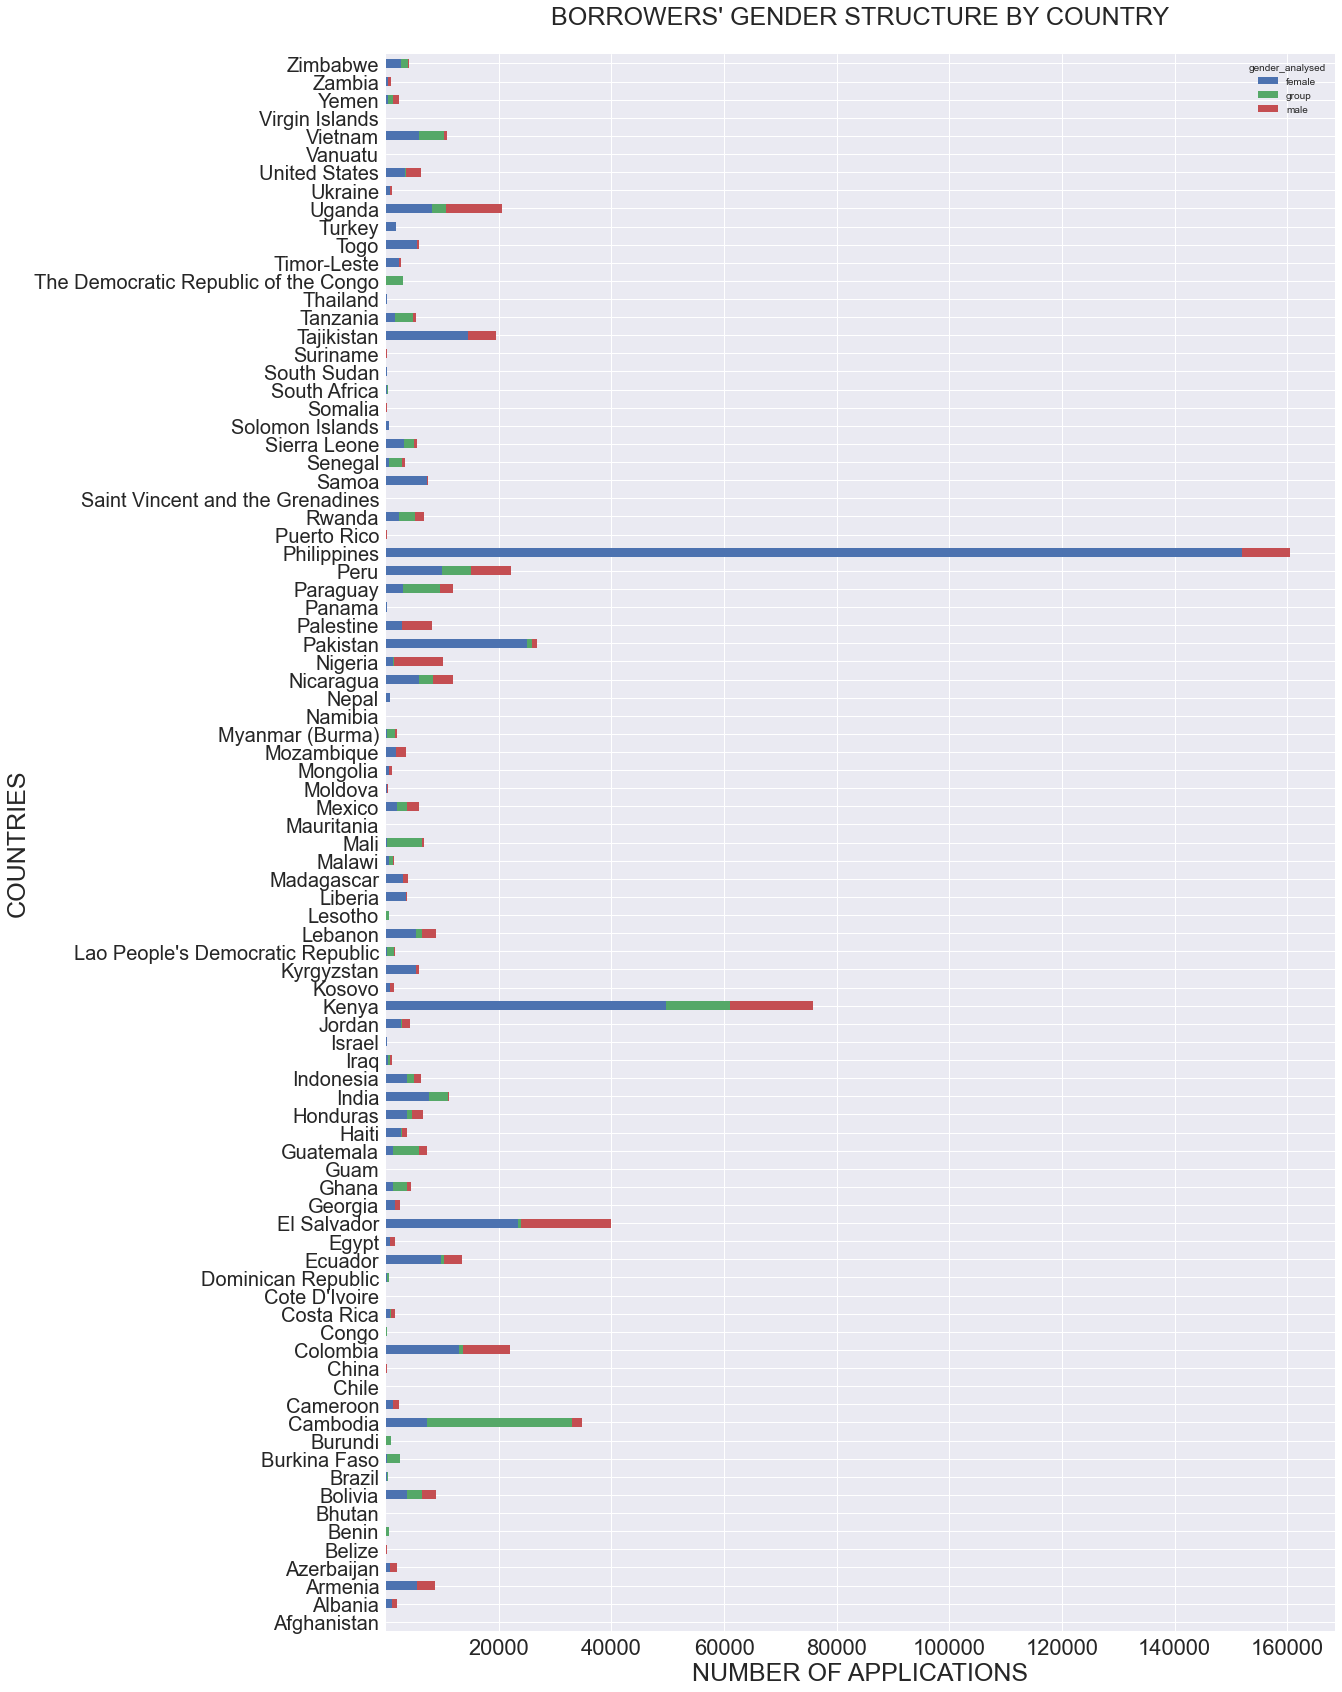

In [ ]:
df_kiva_loans['app_count'] =  [1 for i in range(df_kiva_loans.shape[0])]
count_gen = df_kiva_loans.groupby(['country', 'gender_analysed']).sum().dropna()['app_count'].unstack().fillna(0)
count_gen.plot(kind = 'barh', 
               stacked = True, 
              figsize = (17,29))
plt.title("Borrowers' gender structure by country".upper(), **font_settings, pad = 30)
plt.xlabel('number of applications'.upper(), **font_settings)
plt.ylabel('countries'.upper(), **font_settings)
plt.show()

**CONCLUSION**:
<BR>We have spotted that females tend to borrow more no matter what country they are from. Thus, it is important to determine other factors pre-determining this phenomenon. 

<hr> 

### 9 - Is there any correlation between gender and number of applications in various macroregions? 

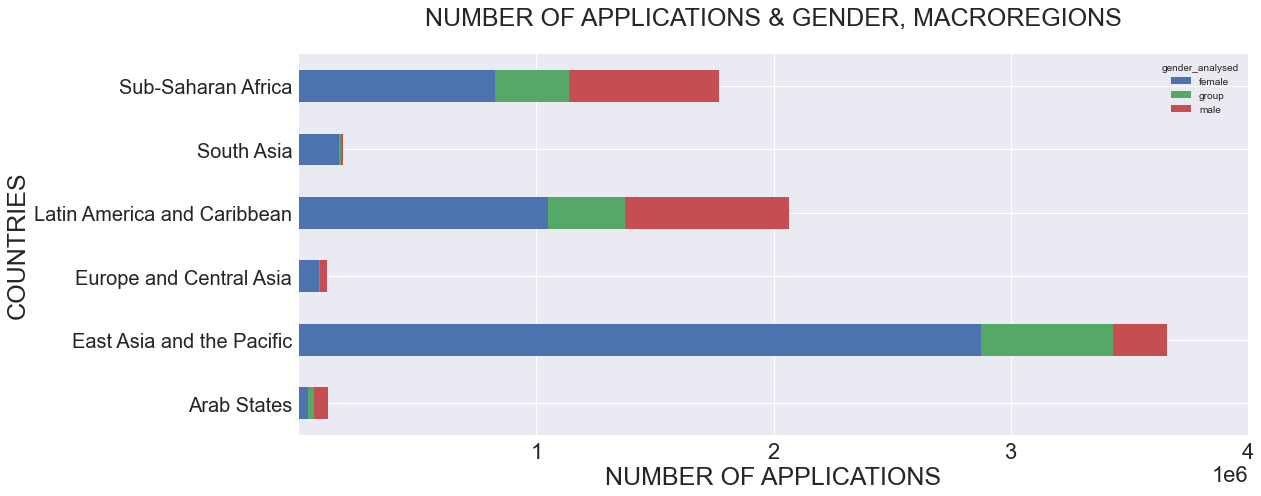

In [ ]:
two_dfs = df_kiva_loans.merge(df_mpi, on = 'country')
reg_gen = two_dfs.groupby(['world_region', 'gender_analysed']).sum().dropna()['app_count'].unstack().fillna(0)
reg_gen.plot(kind = 'barh', 
               stacked = True, 
              figsize = (17,7))
plt.title('Number of applications & gender, macroregions'.upper(), **font_settings, pad = 30)
plt.xlabel('number of applications'.upper(), **font_settings)
plt.ylabel('countries'.upper(), **font_settings)
plt.xticks([i for i in range(1000000, 5000000, 1000000)])
plt.show()

**CONCLUSION**:
<BR>**Females prevail** no matter what region we take into consideration.

<hr>

### 10 - Number of applications in various sectors for different gender groups

<hr>

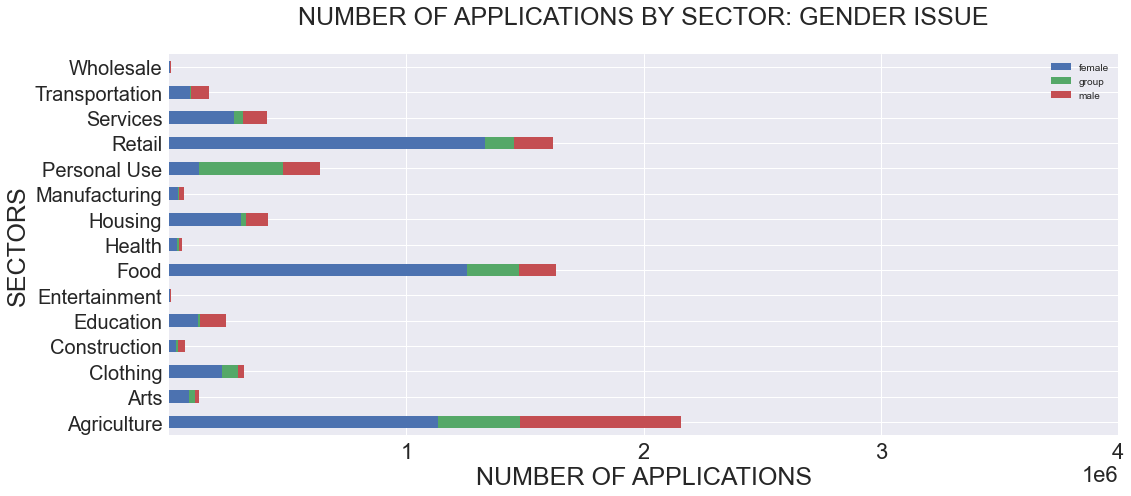

In [ ]:
sector_gen = two_dfs.groupby(['sector', 'gender_analysed']).sum().dropna()['app_count'].unstack().fillna(0)
sector_gen.plot(kind = 'barh', 
               stacked = True, 
              figsize = (17,7))
plt.title('Number of applications by sector: gender issue'.upper(), **font_settings, pad = 30)
plt.xlabel('number of applications'.upper(), **font_settings)
plt.ylabel('sectors'.upper(), **font_settings)
plt.xticks([i for i in range(1000000, 5000000, 1000000)])
plt.legend()
plt.show()

<hr>

### 11 - Correlation:  Lenders | Loans

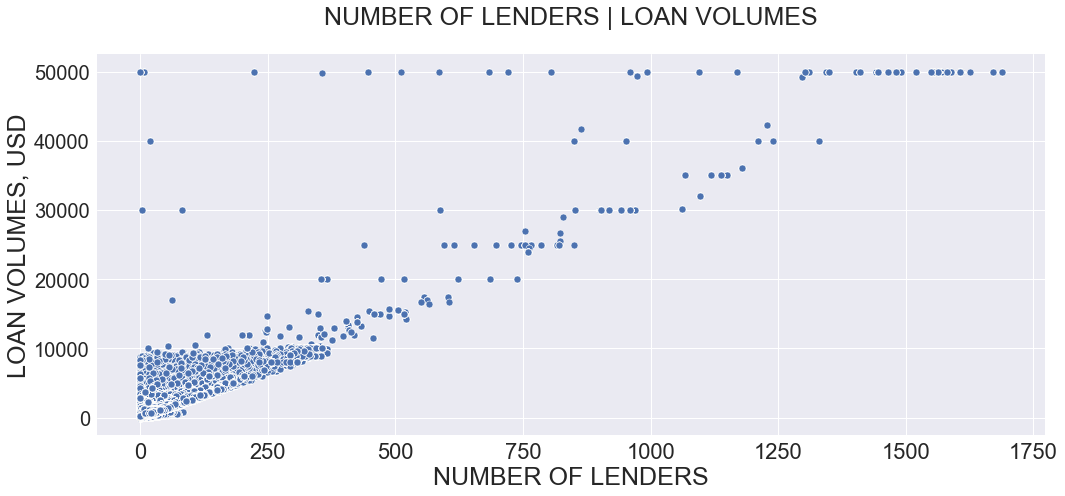

In [ ]:
# Getting red of the outlier
two_dfs_clean = two_dfs[two_dfs['lender_count'] != two_dfs['lender_count'].max()]

fig_scatter, ax_scatter = plt.subplots(figsize = (17, 7))

sns.scatterplot(data = two_dfs_clean, 
               x = two_dfs_clean.lender_count,
               y = two_dfs_clean.loan_amount)

ax_scatter.set_xlabel('Number of lenders'.upper(), **font_settings)

ax_scatter.set_ylabel('loan volumes, usd'.upper(), **font_settings)

ax_scatter.set_title('number of lenders | loan volumes'.upper(), **font_settings, pad = 30)

plt.show()

<hr>

There's kind of correlation. 
Let's design a regression model!

**COEFFICIENTS:**

In [ ]:
from sklearn.linear_model import LinearRegression
X = two_dfs_clean[['lender_count']]
y = two_dfs_clean['loan_amount']
reg_1 = LinearRegression().fit(X, y)
print(reg_1.coef_, reg_1.intercept_)

[32.26758517] 111.79856882032504


**APPROXIMATION FUNCTION:**

In [ ]:
from sympy import * 
x,y = symbols('x,y')
f_appr = reg_1.intercept_ + list(reg_1.coef_)[0]*x
f_appr

32.267585169879*x + 111.798568820325

**VISUALIZATION WITH SCATTER & LINE PLOTS:**

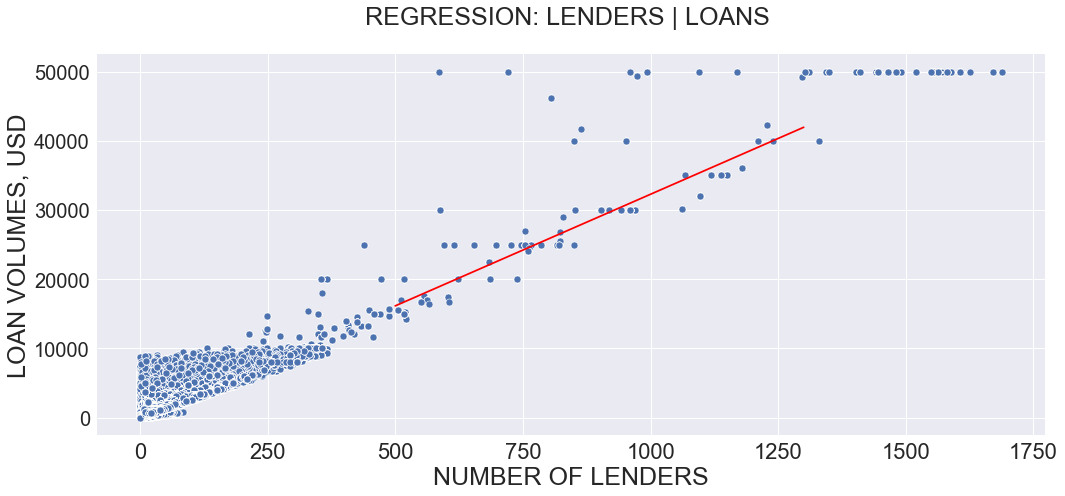

In [ ]:
fig_scatter_1, ax_scatter_1 = plt.subplots(figsize = (17, 7))

sns.scatterplot(data = two_dfs, 
               x = two_dfs_clean.lender_count,
               y = two_dfs_clean.funded_amount)

sns.lineplot(x = [500, 1000, 1300],  
            y = [list(reg_1.coef_)[0]*500, list(reg_1.coef_)[0]*1000, list(reg_1.coef_)[0]*1300 ], 
            color = 'red')

ax_scatter_1.set_xlabel('number of lenders'.upper(), **font_settings)

ax_scatter_1.set_ylabel('loan volumes, usd'.upper(), **font_settings)

ax_scatter_1.set_title('regression: lenders | loans '.upper(), **font_settings, pad = 30)

plt.show()

**CONCLUSION**: 
Each additional lender is associated with the raise in loan volumes by 32 USD. 

<hr>

### 12 - What is the median value for loans with various numbers of lenders? 

In [ ]:
df_kiva_loans['lender_count_binned'] = pd.cut(df_kiva_loans['lender_count'], bins=[0, 3, 7, 12, 23, 100, 268])

bins_groupping = df_kiva_loans.groupby('lender_count_binned').median()[['loan_amount', 'term_in_months']]

print('Loans and payback monthly periods for loans with various numbers of lenders (median values)'.upper())
bins_groupping

LOANS AND PAYBACK MONTHLY PERIODS FOR LOANS WITH VARIOUS NUMBERS OF LENDERS (MEDIAN VALUES)


,loan_amount,term_in_months
lender_count_binned,,
"(0, 3]",225.0,8.0
"(3, 7]",200.0,9.0
"(7, 12]",300.0,12.0
"(12, 23]",550.0,14.0
"(23, 100]",1200.0,14.0
"(100, 268]",4650.0,12.0


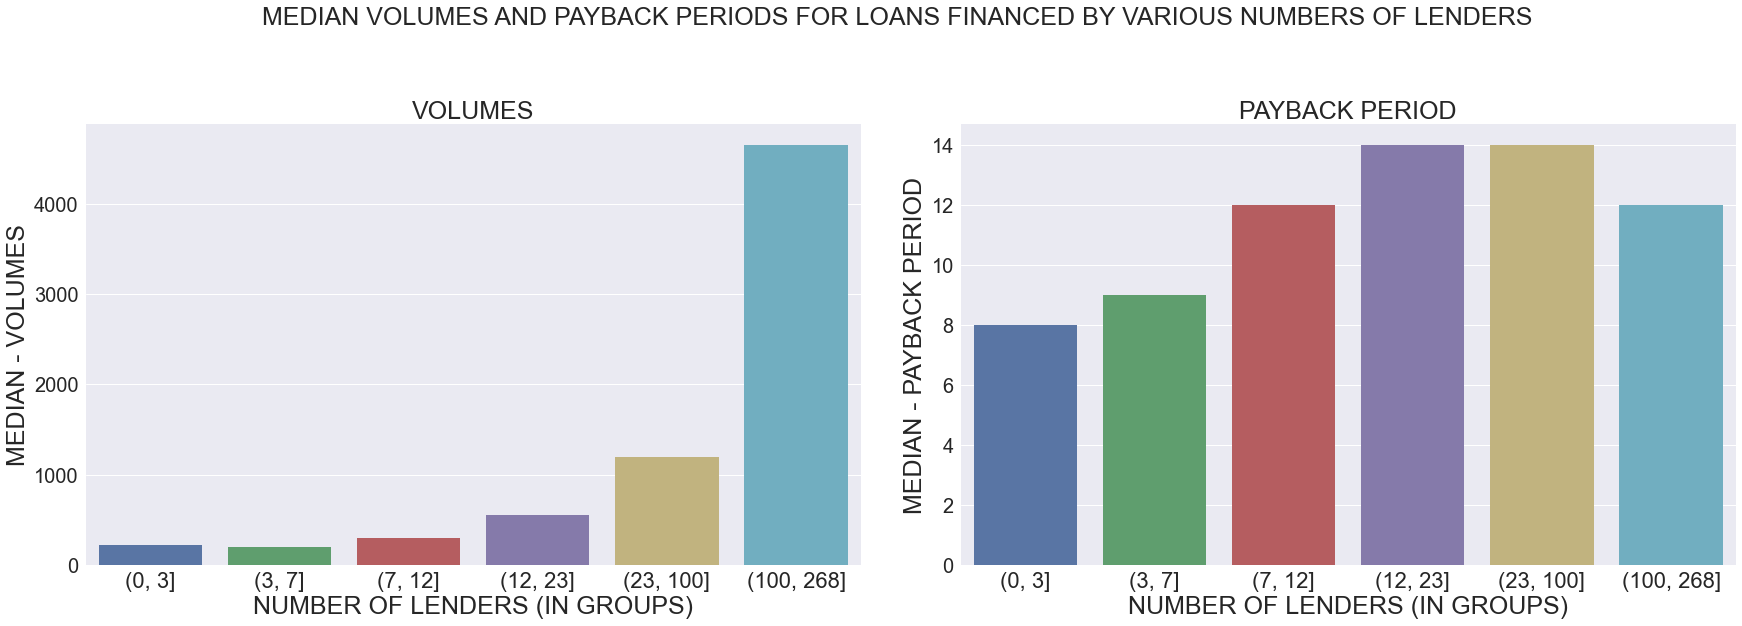

In [ ]:
lender_f, lender_ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 9), sharex = True)
lender_f.suptitle('median volumes and payback periods for loans financed by various numbers of lenders '.upper(), **font_settings)
lender_f.tight_layout(pad = 5)

for col in [{'position': 0, 'column': 'loan_amount', 'title': 'volumes'.upper()},  
            {'position': 1, 'column': 'term_in_months', 'title': 'payback period'.upper()}]:
    sns.barplot(ax = lender_ax[col['position']],
           data = bins_groupping, 
           x = bins_groupping.index, 
           y = bins_groupping[col['column']])
    lender_ax[col['position']].set_title(col['title'], **font_settings)
    lender_ax[col['position']].set_ylabel(f"MEDIAN - {col['title']}", **font_settings)
    lender_ax[col['position']].set_xlabel('number of lenders (in groups)'.upper(), **font_settings)

<hr>

Perfomed & released by Vsevolod Kotenev
<br>https://www.linkedin.com/in/vkotenev/